In [2]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools
import warnings
from matplotlib import rcParams

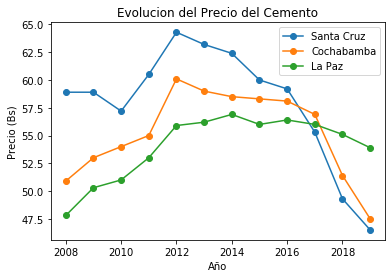

In [3]:
scz = [58.9,58.9,57.2,60.5,64.3,63.2,62.4,60,59.2,55.3,49.3,46.5]
cba = [50.9,53,54,55,60.1,59,58.5,58.3,58.1,56.9,51.4,47.5]
lpz = [47.8,50.3,51,53,55.9,56.2,56.9,56,56.4,56,55.1,53.9]
b = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
plt.plot(b,scz, '-o', label='Santa Cruz')
plt.plot(b,cba, '-o', label='Cochabamba')
plt.plot(b,lpz, '-o', label='La Paz')
plt.legend(loc='upper right')
plt.title('Evolucion del Precio del Cemento')
plt.xlabel('Año')
plt.ylabel('Precio (Bs)')
plt.show()

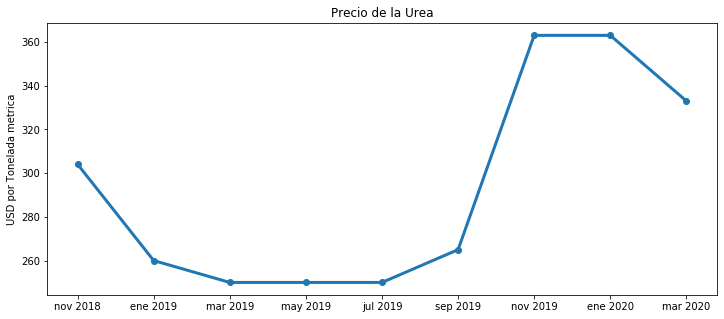

In [17]:
rcParams['figure.figsize'] = 12, 5
b = ['nov 2018', 'ene 2019', 'mar 2019', 'may 2019', 'jul 2019', 'sep 2019', 'nov 2019', 'ene 2020', 'mar 2020']
a = [304, 260, 250, 250, 250, 265, 363, 363, 333]
plt.ylabel('USD por Tonelada metrica')
plt.title('Precio de la Urea')
plt.plot(b,a, '-o', linewidth=3.0)

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


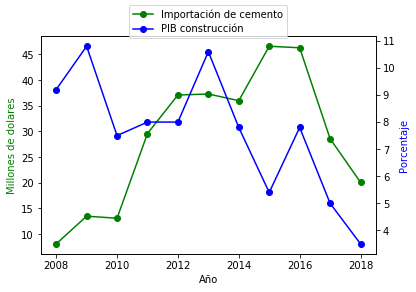

In [51]:
imp = [8.1, 13.5, 13.1, 29.6, 37.1, 37.3, 36, 46.6, 46.3, 28.6, 20.1]
pibc = [9.2, 10.8, 7.5, 8, 8, 10.6, 7.8, 5.4, 7.8, 5, 3.5]
b = np.arange(2008,2019,1).tolist()
print(b)

x = b
y1 = imp
y2 = pibc

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-o', label='Importación de cemento')
ax2.plot(x, y2, 'b-o', label='PIB construcción')

fig.legend(loc='upper center')
# ax2.legend(loc='lower center')
ax1.set_xlabel('Año')
ax1.set_ylabel('Millones de dolares', color='g')
ax2.set_ylabel('Porcentaje', color='b')

plt.show()

In [3]:
def arima_model(data, numpr):
    X = data
    actual_size = len(data)
    train_size = int(0.75*len(data))
    train = X[0:train_size]
    test = X[train_size - 1:]
    
    best_aic = 99999
    # p=(3,4,6)
    p=range(1,3)
    d=range(0,3)
    q=range(1,5)
    pdq = list(itertools.product(p, d, q))
    
    warnings.filterwarnings('ignore')
    for param in pdq:
        try:
            model_arima = ARIMA(train, order = param)
            model_arima_fit = model_arima.fit()
            aic = model_arima_fit.aic
            print(param, aic)
            if aic < best_aic:
                best_aic = aic
                best_pdq = param
                best_fit = model_arima_fit
        except:
            continue    
    
    model_arima = ARIMA(train, order=best_pdq)
    # model_arima_fit = model_arima.fit()
    aic = best_fit.aic
    predictions = best_fit.forecast(steps=(actual_size - train_size + 1 + numpr))[0]
    mse = mean_squared_error(test, predictions[0:len(test)])
    j_pre = predictions[-numpr:]
    return predictions, train, test, aic, mse, best_pdq, j_pre

(1, 0, 3) 557.669312519667
(1, 0, 4) 559.6151960763084
(1, 1, 1) 520.5224469015892
(1, 1, 2) 521.9922464317326
(1, 1, 3) 523.2651617836804
(1, 2, 1) 496.46311522766916
(1, 2, 2) 498.4436167455245
(1, 2, 3) 499.6807940165516
(2, 0, 1) 554.9943340445102
(2, 0, 2) 556.9936191495342
(2, 1, 2) 523.5289471524267
(2, 1, 3) 526.0368321224778


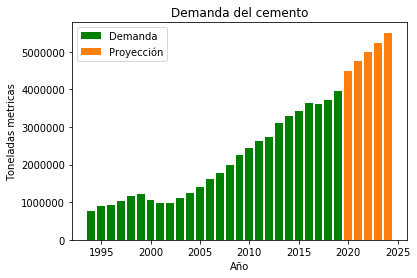

In [29]:
demanda = [773812, 903855, 923227, 1038907, 1156574, 1224343, 1068155, 966142, 991393, 1109206, 1256648, 1415754, 1608532, 1766952, 1983101, 2248641, 2449533, 2638169, 2727063, 3098077, 3295268, 3417073, 3633413, 3601773, 3722049, 3956990]
a = np.arange(1994, 2020, 1).tolist()
b = np.arange(2020, 2025, 1).tolist()
pre_dem = arima_model(produccion, 5)[6]
plt.bar(a, demanda, color='green', label='Demanda')
plt.bar(b, pre_dem, color='C1', label='Proyección')
plt.title('Demanda del Cemento')
plt.legend(loc='upper left')
plt.title('Demanda del cemento')
plt.xlabel('Año')
plt.ylabel('Toneladas metricas')
plt.show()

(1, 0, 3) 557.669312519667
(1, 0, 4) 559.6151960763084
(1, 1, 1) 520.5224469015892
(1, 1, 2) 521.9922464317326
(1, 1, 3) 523.2651617836804
(1, 2, 1) 496.46311522766916
(1, 2, 2) 498.4436167455245
(1, 2, 3) 499.6807940165516
(2, 0, 1) 554.9943340445102
(2, 0, 2) 556.9936191495342
(2, 1, 2) 523.5289471524267
(2, 1, 3) 526.0368321224778


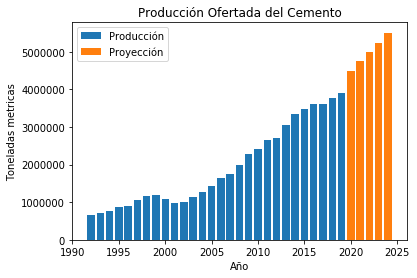

In [30]:
produccion = [649644, 717607, 776302, 877003, 897146, 1047951, 1166511, 1201274, 1071941, 982543, 1010446, 1138146, 1276412, 1439951, 1636079, 1738649, 1985411, 2291605, 2414382, 2657650, 2714089, 3061147, 3336940, 3468209, 3601337, 3610989, 3757392, 3900345]
a = np.arange(1992, 2020, 1).tolist()
b = np.arange(2020, 2025, 1).tolist()
pre_pro = arima_model(produccion, 5)[6]
plt.bar(a, produccion, label='Producción')
plt.bar(b, pre_pro, color='C1', label='Proyección')
plt.title('Producción Ofertada del Cemento')
plt.legend(loc='upper left')
plt.xlabel('Año')
plt.ylabel('Toneladas metricas')
plt.show()

(1, 1, 1) 547.769883708545
(1, 2, 1) 524.9691007349426
(1, 2, 2) 526.4513611878941
(1, 2, 3) 527.5324113441903
(1, 2, 4) 526.5710492099586
(2, 2, 1) 527.2446606683262
(2, 2, 2) 527.066495136308
(2, 2, 3) 530.5810552918579
(2, 2, 4) 528.4266809506113
[4049530.94327738 4200838.08786456 4352810.62615223 4505448.55798736
 4658751.88334799]


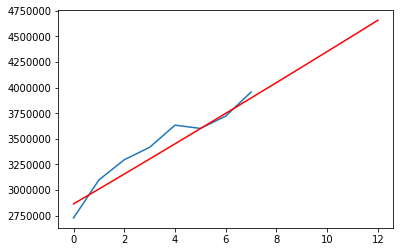

P, D, Q (1, 2, 1)
AIC: 524.9691007349426
MSE: 12080460888.676357


In [72]:
arima_func = arima_model(demanda, 5)
predictions = arima_func[0]
train = arima_func[1]
test = arima_func[2]
aic = arima_func[3]
mse = arima_func[4]
best_pdq = arima_func[5]
act_pre = arima_func[6]
print(act_pre)
str_i = 'AIC: ' + str(aic) + '\nMSE: ' + str(mse)


plt.plot(test)
plt.plot(predictions, 'r')
plt.show()

print('P, D, Q', best_pdq)
print(str_i)

In [6]:
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())


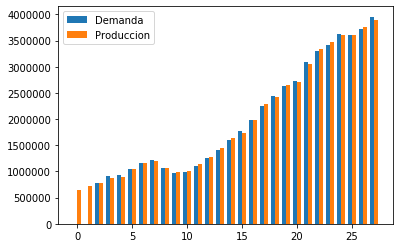

In [31]:
demanda = [0, 0, 773812, 903855, 923227, 1038907, 1156574, 1224343, 1068155, 966142, 991393, 1109206, 1256648, 1415754, 1608532, 1766952, 1983101, 2248641, 2449533, 2638169, 2727063, 3098077, 3295268, 3417073, 3633413, 3601773, 3722049, 3956990]
produccion = [649644, 717607, 776302, 877003, 897146, 1047951, 1166511, 1201274, 1071941, 982543, 1010446, 1138146, 1276412, 1439951, 1636079, 1738649, 1985411, 2291605, 2414382, 2657650, 2714089, 3061147, 3336940, 3468209, 3601337, 3610989, 3757392, 3900345]
ax = np.arange(1992, 2020, 1).tolist()
#plt.bar(a, demanda)
#plt.bar(a, produccion)
data = {
        "Demanda": demanda,
        "Produccion": produccion,
    }

fig, ax = plt.subplots()
bar_plot(ax, data, total_width=.7, single_width=1)
plt.show()


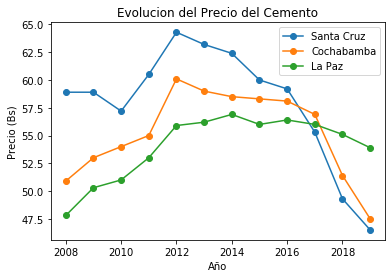

In [22]:
scz = [58.9,58.9,57.2,60.5,64.3,63.2,62.4,60,59.2,55.3,49.3,46.5]
cba = [50.9,53,54,55,60.1,59,58.5,58.3,58.1,56.9,51.4,47.5]
lpz = [47.8,50.3,51,53,55.9,56.2,56.9,56,56.4,56,55.1,53.9]
b = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
plt.plot(b,scz, '-o', label='Santa Cruz')
plt.plot(b,cba, '-o', label='Cochabamba')
plt.plot(b,lpz, '-o', label='La Paz')
plt.legend(loc='upper right')
plt.title('Evolucion del Precio del Cemento')
plt.xlabel('Año')
plt.ylabel('Precio (Bs)')
plt.show()

In [12]:
from scipy.interpolate import make_interp_spline, BSpline

def smplot(X, Y, p = 300):
    X = np.array(X)
    Y = np.array(Y)
    newx = np.linspace(X.min(), X.max(), 300)
    spl = make_interp_spline(X, Y, k=3)
    smoothy = spl(newx)
    return newx, smoothy

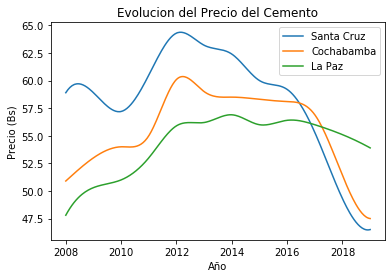

In [21]:
sm = smplot(b, scz)
year = sm[0]
scz_sm = sm[1]
cba_sm = smplot(b, cba)[1]
lpz_sm = smplot(b, lpz)[1]
plt.plot(year,scz_sm, '', label='Santa Cruz')
plt.plot(year,cba_sm, '', label='Cochabamba')
plt.plot(year,lpz_sm, '', label='La Paz')
plt.legend(loc='upper right')
plt.title('Evolucion del Precio del Cemento')
plt.xlabel('Año')
plt.ylabel('Precio (Bs)')
plt.show()